# Strategy to Visualize Pakistani Intellectua dataset

### The dataset has 1900+ values which include the name of the professor, University/ country they graduated from, department, province, etc. 

### The objective of this notebook is to visualize the data in this dataset to answer the following questions:

#### 1. Highest degree Vs Country of education (How many PhD's from USA or UK)
#### 2. PhD's vs Country of education
#### 3. Province vs PhD's
#### 4. Department's with most PhD's
#### 5. Corelation of data with Province Wise Literacy rate 

### Following are the steps taken to answer the above question:

#### a. Setting Up Variable Environment
#### b. Fix inconsistent data using FuzzyWuzzy (I Only Fixed Degree Titles)
#### c. Data Pre-Processing
#### d. Data Visualization

# Setting up Environment Variables
### The first thing we do is to import all the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
from collections import Counter
np.random.seed(0)

data=pd.read_csv("pakistanIntellectual.csv",engine='python')

C:\Users\hasee\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# data.head()

In [3]:
data['Terminal Degree'].value_counts()

MSc                               790
PhD                               504
BS                                101
MBA                                11
BSCS                                6
BE                                  6
BCS                                 4
Bachelors                           3
B.E                                 3
BSC                                 2
M.Com                               1
BSc                                 1
Doctor of Professional Studies      1
M.Eng                               1
MBS                                 1
M.Phil leading to PhD               1
BSIT                                1
BIT                                 1
BA                                  1
B.Ed                                1
Name: Terminal Degree, dtype: int64

In [4]:
# Removing Period(.) from the 'Degree_Title'
train_test_data=[data]
for dataset in train_test_data:
  dataset['degree_title']=dataset['Terminal Degree'].str.extract('([A-Za-z]+)',expand=False)

In [5]:
data['degree_title'].value_counts()

MSc          790
PhD          504
BS           101
MBA           11
BSCS           6
BE             6
BCS            4
B              4
M              3
Bachelors      3
BSC            2
MBS            1
BSIT           1
BSc            1
BIT            1
BA             1
Doctor         1
Name: degree_title, dtype: int64

In [6]:
# The Country data has discrepancy. 
data['Country'].value_counts(dropna=False)

Pakistan              794
NaN                   781
UK                    103
USA                    54
Malaysia               28
France                 27
Austria                24
Germany                22
China                  21
Italy                  18
Sweden                 18
South Korea            15
Thailand               13
Australia              10
Netherland              8
Canada                  7
Ireland                 4
Norway                  3
 USA                    3
Japan                   3
Spain                   3
Singapore               3
Denmark                 2
Portugal                2
 Germany                2
 New Zealand            1
Turkey                  1
Russian Federation      1
Finland                 1
Mauritius               1
Greece                  1
HongKong                1
Macau                   1
New Zealand             1
Urbana                  1
Saudi Arabia            1
Scotland                1
 Sweden                 1
Name: Countr

In [7]:
## remove all the unwanted spaces and change the letters into lower case
# convert to lower case
data['Country'] = data['Country'].str.lower()
# remove trailing white spaces
data['Country'] = data['Country'].str.strip()

 The data regarding the degree needs to be cleaned.
1. Identify similar degree titles
2. Merge identical degree titles 

In [8]:
degree = data['Terminal Degree'].unique()
degree

array(['PhD', 'MSc', 'M.Com', 'B.E', 'BS', nan, 'BE', 'MBA', 'BIT', 'BSC',
       'BSIT', 'Bachelors', 'M.Phil leading to PhD', 'BSCS', 'MBS', 'BCS',
       'B.Ed', 'M.Eng', 'Doctor of Professional Studies', 'BSc', 'BA'],
      dtype=object)

In [9]:
matches = fuzzywuzzy.process.extract("BSc",degree, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('BSC', 100),
 ('BSc', 100),
 ('BSCS', 86),
 ('BS', 80),
 ('MSc', 67),
 ('MBS', 67),
 ('BCS', 67),
 ('BSIT', 57),
 ('BE', 40),
 ('BA', 40)]

I used fuzzywuzzy to gather information about all the keywords that were closely related to PhD and MSc. Basically, I calculated Levenshtein distance between PhD/ MSc and similar terms. I then identified those keywords and replaced them manually in Excel
Basiclly it is a repetitive process. I just kept running the above cell and kept making changes in excel till I changed all the similar degree titles.

In [10]:
data['Terminal Degree'].value_counts()

MSc                               790
PhD                               504
BS                                101
MBA                                11
BSCS                                6
BE                                  6
BCS                                 4
Bachelors                           3
B.E                                 3
BSC                                 2
M.Com                               1
BSc                                 1
Doctor of Professional Studies      1
M.Eng                               1
MBS                                 1
M.Phil leading to PhD               1
BSIT                                1
BIT                                 1
BA                                  1
B.Ed                                1
Name: Terminal Degree, dtype: int64

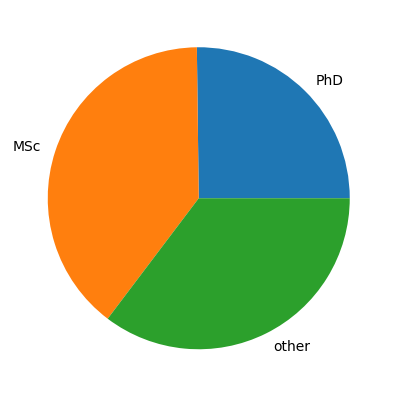

In [11]:
degrees = ['PhD', 'MSc', 'other']
  
dataSet = [504, 790, 706]
  
# Creating plot
fig = plt.figure(figsize =(5, 5),dpi=100)
plt.pie(dataSet, labels = degrees)
  
# show plot
plt.show()

# Analyzing the data

In [12]:
phd_foreign=data.loc[(data['degree_title']=='PhD') & (data['Country']!='pakistan')]
phd_pak=data.loc[(data['degree_title']=='PhD') & (data['Country']=='pakistan')]
phd_usa=data.loc[(data['degree_title']=='PhD') & (data['Country']=='usa')]
phd_uk=data.loc[(data['degree_title']=='PhD') & (data['Country']=='uk')]
phdonly=data.loc[(data['degree_title']=='PhD')]
comsats_data=data.loc[(data['University Currently Teaching']=='COMSATS, Islamabad Campus') &(data['Country']!='pakistan')]

In [ ]:
comsats_data=data.loc[(data['University Currently Teaching']=='COMSATS, Islamabad Campus') &(data['degree_title']=='PhD')]

In [ ]:
phd_in_pak=data.loc[(data['degree_title']=='PhD')]

In [ ]:
phd_in_pak.info()

In [ ]:
phd_in_pak['Province University Located'].describe()

In [ ]:
((phd_in_pak['Province University Located']!='Capital')&(phd_in_pak['Province University Located']!='Punjab')).sum()

In [ ]:
phd_in_pak.to_csv("comsats.csv", index=False)

In [ ]:
data['Country'].value_counts()

In [ ]:
data['title'].value_counts()

In [ ]:
data.loc[(data['Province University Located']=='Punjab') & (data['Country']=='USA')]

In [ ]:
data['University Currently Teaching'].value_counts()

In [ ]:
data.info()

In [ ]:
data['Year'].plot(kind='density',figsize=(14,6))

In [ ]:
data["University Currently Teaching"].describe()

In [ ]:
data["University Currently Teaching"].unique()

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data["Graduated from"].unique()

In [ ]:
country_count=data["Country"].value_counts()
print(country_count)
# (country_count).sum()

In [ ]:
data["University Currently Teaching"].value_counts()

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
(data["Country"].isnull()).sum()

In [ ]:
usagrad=data.loc[data['Country'] == 'USA']
ukgrad=data.loc[data['Country'] == 'UK']

In [ ]:
usagrad.head()

In [ ]:
usagrad["Department"].describe()

In [ ]:
usagrad.count()

In [ ]:
ukgrad["University Currently Teaching"].describe()

In [ ]:
ukgrad["Graduated from"].describe()

In [ ]:
usagrad["University Currently Teaching"].describe()

In [ ]:
data["University Currently Teaching"].describe()

In [ ]:
usagrad["University Currently Teaching"].value_counts()

In [ ]:
ukgrad["University Currently Teaching"].value_counts()

In [ ]:
usagrad["Province University Located"].value_counts()

In [ ]:
(usagrad["Terminal Degree"]=="PhD").sum()

In [ ]:
ukgrad["Province University Located"].value_counts()

In [ ]:
# usagrad["Teacher Name"].map(lambda desc: "Basit" in desc)
faisal=data["Teacher Name"].map(lambda desc: "Faisal" in desc)
ubaid=data["Teacher Name"].map(lambda desc: "Ubaid" in desc)
descriptor_counts = pd.Series([faisal.sum(), ubaid.sum()], index=['faisal', 'ubaid'])
print(descriptor_counts)

In [ ]:
data["University Currently Teaching"].value_counts().plot(kind='bar',figsize=(14,6))

In [ ]:
usagrad["University Currently Teaching"].value_counts().plot(kind='bar',figsize=(14,6))

In [ ]:
corr=data.corr()
corr

# Data Visualizing

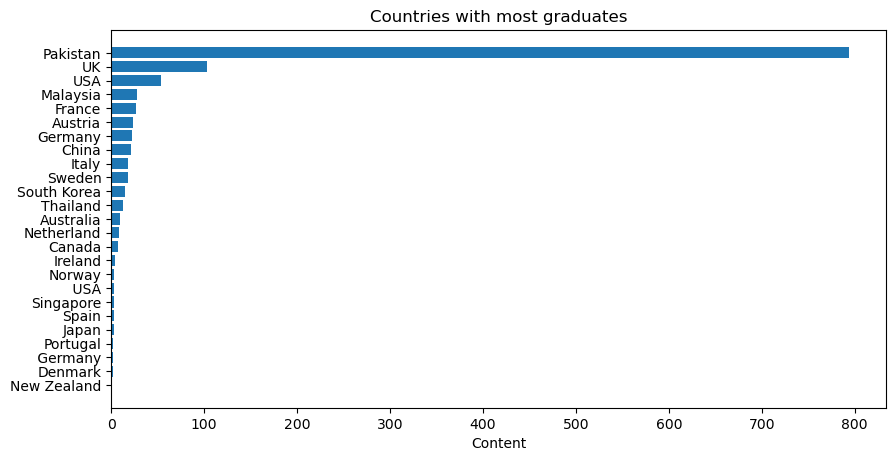

In [41]:
col = data['Country'].dropna()

# categories = ", ".join(df[col].fillna("")).split(", ")
counter_list = Counter(col).most_common(25)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
y_pos = np.arange(len(labels))
ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Content')
ax.set_title('Countries with most graduates')

plt.show()

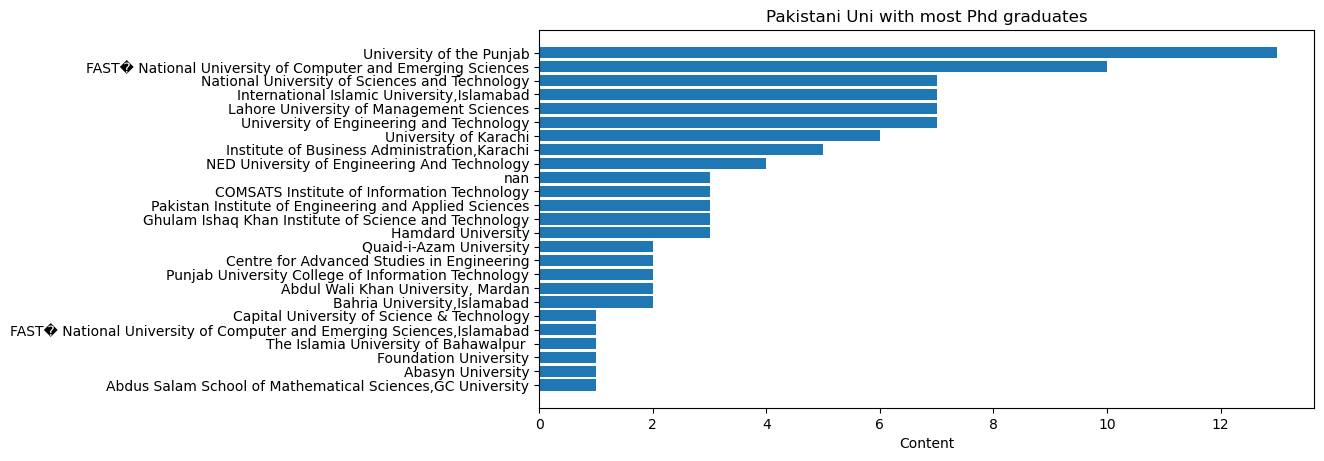

In [47]:
col = phd_pak['Graduated from']

# categories = ", ".join(df[col].fillna("")).split(", ")
counter_list = Counter(col).most_common(25)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
y_pos = np.arange(len(labels))
ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Content')
ax.set_title('Pakistani Uni with most Phd graduates')

plt.show()

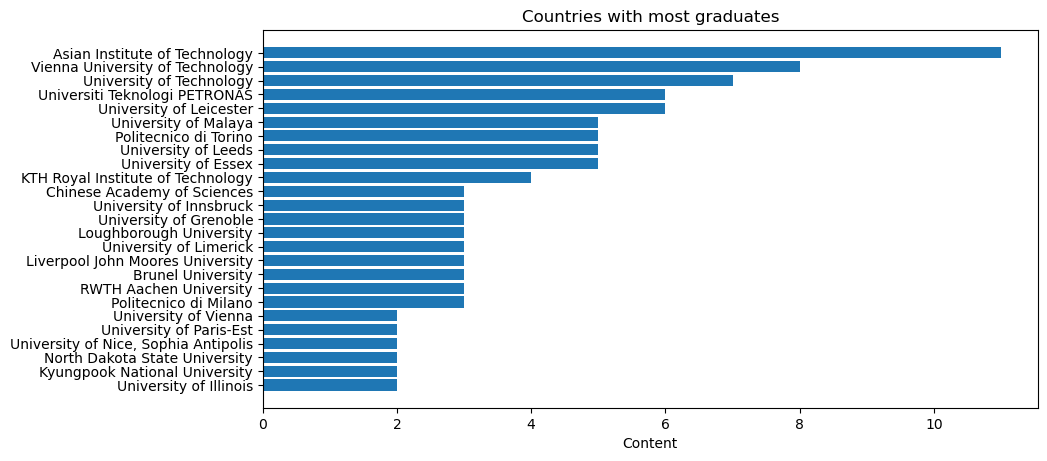

In [46]:
col = phd_foreign['Graduated from'].dropna()

# categories = ", ".join(df[col].fillna("")).split(", ")
counter_list = Counter(col).most_common(25)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
y_pos = np.arange(len(labels))
ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Content')
ax.set_title('Countries with most graduates')

plt.show()

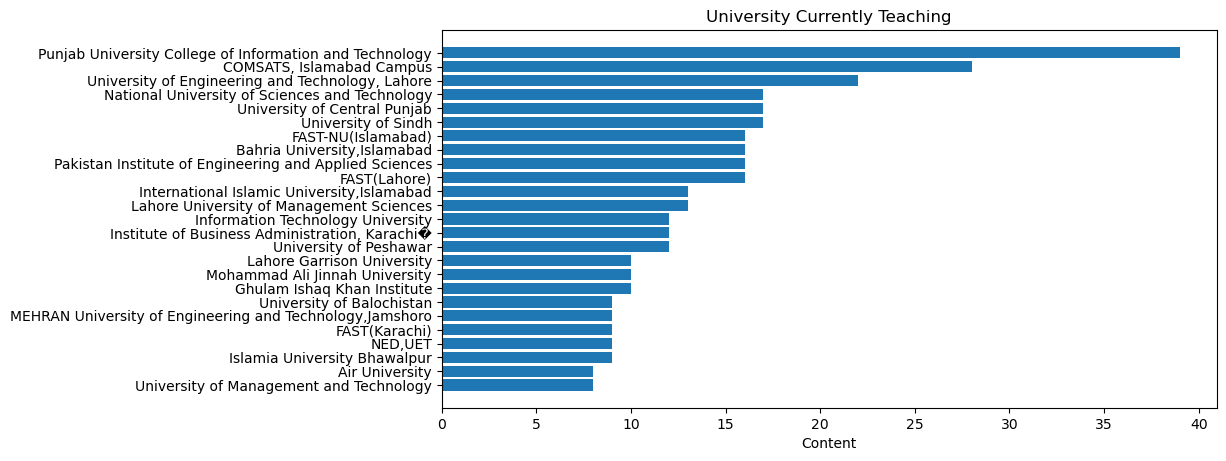

In [13]:
col = phdonly['University Currently Teaching']

# categories = ", ".join(df[col].fillna("")).split(", ")
counter_list = Counter(col).most_common(25)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
y_pos = np.arange(len(labels))
ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Content')
ax.set_title('University Currently Teaching')

plt.show()